In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
data=pd.read_csv(r"D:\data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [107]:
data.isna().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                  59
smoothness_mean             0
compactness_mean            0
concavity_mean             53
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [108]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
data['area_mean']=mean_imputer.fit_transform(data[['area_mean']])
data['concavity_mean']=mean_imputer.fit_transform(data[['concavity_mean']])

In [109]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [110]:
features=data.drop("diagnosis",axis=1)
target=data["diagnosis"]

In [111]:
features

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [112]:
target.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

C:\Users\M\AppData\Local\Temp\ipykernel_10300\3484206358.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data, palette='viridis')


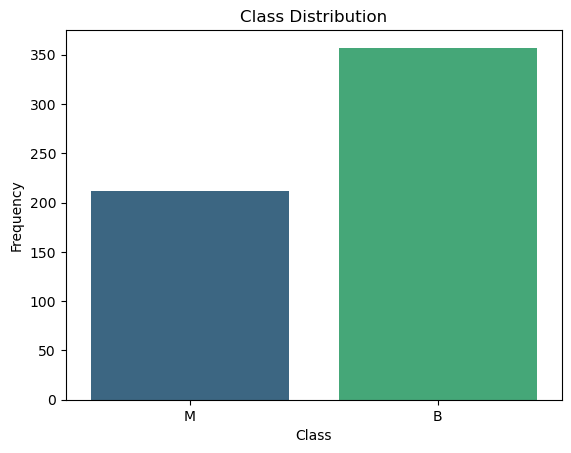

In [113]:
sns.countplot(x='diagnosis', data=data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [114]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [115]:
x_sm,y_sm=sm.fit_resample(features,target)

In [116]:
y_sm.value_counts()

diagnosis
M    357
B    357
Name: count, dtype: int64

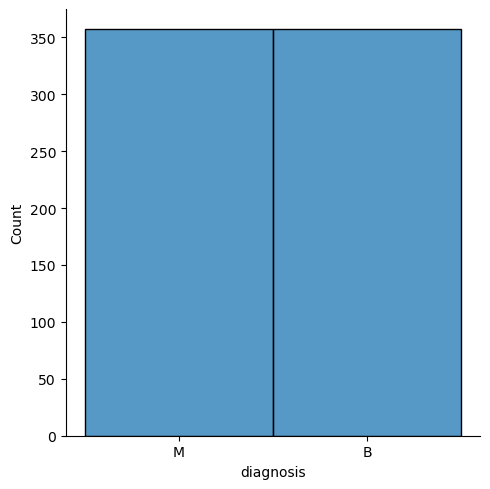

In [117]:
sns.displot(y_sm)

In [118]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target,test_size=0.2,random_state=42)

In [119]:
from sklearn.preprocessing import MinMaxScaler
numcol=data.select_dtypes(include=[np.number]).columns
sc=MinMaxScaler()
Xtrain[numcol]=sc.fit_transform(Xtrain[numcol])
Xtest[numcol]=sc.transform(Xtest[numcol])

In [120]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [121]:
y_pred=model.predict(Xtest)

In [122]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix=confusion_matrix(Ytest,y_pred)
print(matrix)
print(accuracy_score(y_pred,Ytest))

[[69  2]
 [ 2 41]]
0.9649122807017544


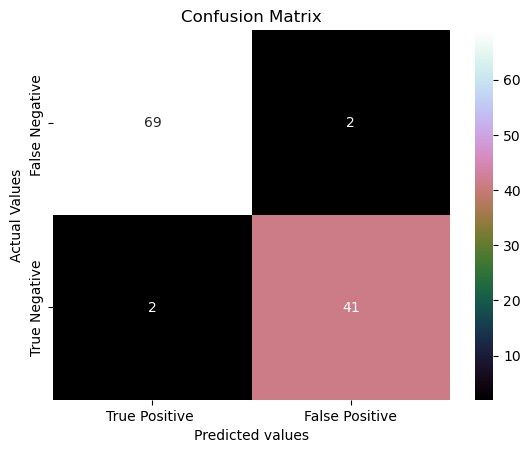

In [123]:
vis=sns.heatmap(matrix, annot=True,cmap="cubehelix")
vis.set_title("Confusion Matrix")
vis.set_xlabel("Predicted values")
vis.set_ylabel("Actual Values")
vis.xaxis.set_ticklabels(['True Positive ','False Positive'])
vis.yaxis.set_ticklabels(['False Negative ','True Negative'])
plt.show()

In [124]:
Ytest_array=Ytest.values
print(np.concatenate((y_pred.reshape(len(y_pred),1),Ytest_array.reshape(len(Ytest),1)),1))

[['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']